In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.optimizers import Adam
import keras.backend as K
from keras.datasets import mnist

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data('E:\\myproj\\mnist.npz')

In [3]:
X_train.shape
X_test.shape

(10000, 28, 28)

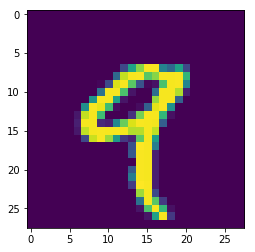

In [4]:
#Visualization
plt.imshow(X_train[4])

In [5]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(10000, 28, 28, 1)

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [7]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

## Building a Convolutional Neural Network

In [8]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation = 'relu'))#(3,3) is the filter size
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train_cat,batch_size=150,epochs=5,verbose=2,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 45s - loss: 0.1493 - acc: 0.9519 - val_loss: 0.0726 - val_acc: 0.9796
Epoch 2/5
 - 42s - loss: 0.0500 - acc: 0.9845 - val_loss: 0.0493 - val_acc: 0.9863
Epoch 3/5
 - 42s - loss: 0.0402 - acc: 0.9871 - val_loss: 0.0554 - val_acc: 0.9838
Epoch 4/5
 - 42s - loss: 0.0328 - acc: 0.9894 - val_loss: 0.0541 - val_acc: 0.9826
Epoch 5/5
 - 42s - loss: 0.0294 - acc: 0.9900 - val_loss: 0.0719 - val_acc: 0.9840


In [15]:
model.evaluate(X_test,y_test_cat)

10000/10000 [==============================] - 3s 331us/step


[0.06270368877768996, 0.9839]

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               102528    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

## Thank you 
